## **Pemodelan dan Visualisasi Data untuk Analisis Serangan DDoS Botnet pada Perangkat IOT**

## **Data Understanding and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder


Import Data

In [2]:
df = pd.read_csv('DDoSdata.csv')
df

C:\Users\Adelia Deswita\AppData\Local\Temp\ipykernel_14372\2208589635.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DDoSdata.csv')


,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577359,3577357,1.526352e+09,e,1,udp,3,192.168.100.3,36242,205.251.194.102,...,6.83201,2,74,6.81487,9.49326,4,122,0,Normal,Normal
1927097,3577360,3577358,1.526352e+09,e,1,udp,3,192.168.100.3,63574,205.251.194.102,...,6.83201,2,74,6.84924,9.49326,4,122,0,Normal,Normal
1927098,3577361,3577359,1.526352e+09,e,1,udp,3,192.168.100.3,59485,205.251.194.154,...,7.19694,1,74,7.19694,9.49326,2,122,0,Normal,Normal
1927099,3577362,3577360,1.526352e+09,e,1,udp,3,192.168.100.3,20844,192.31.80.30,...,7.12689,2,74,7.12398,9.49326,4,122,0,Normal,Normal


**Data Inspection**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927101 entries, 0 to 1927100
Data columns (total 47 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Unnamed: 0                        int64  
 1   pkSeqID                           int64  
 2   stime                             float64
 3   flgs                              object 
 4   flgs_number                       int64  
 5   proto                             object 
 6   proto_number                      int64  
 7   saddr                             object 
 8   sport                             object 
 9   daddr                             object 
 10  dport                             object 
 11  pkts                              int64  
 12  bytes                             int64  
 13  state                             object 
 14  state_number                      int64  
 15  ltime                             float64
 16  seq                               in

In [4]:
df.dtypes

Unnamed: 0                            int64
pkSeqID                               int64
stime                               float64
flgs                                 object
flgs_number                           int64
proto                                object
proto_number                          int64
saddr                                object
sport                                object
daddr                                object
dport                                object
pkts                                  int64
bytes                                 int64
state                                object
state_number                          int64
ltime                               float64
seq                                   int64
dur                                 float64
mean                                float64
stddev                              float64
sum                                 float64
min                                 float64
max                             

In [5]:
df.shape

(1927101, 47)

**Data Cleaning**

Checking Missing Values

In [6]:
missing_data = df.isnull().sum()
print(missing_data)

Unnamed: 0                          0
pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes      

Dropping Unused Columns

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,80,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,80,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,80,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,80,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,80,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927096,3577357,1.526352e+09,e,1,udp,3,192.168.100.3,36242,205.251.194.102,53,...,6.83201,2,74,6.81487,9.49326,4,122,0,Normal,Normal
1927097,3577358,1.526352e+09,e,1,udp,3,192.168.100.3,63574,205.251.194.102,53,...,6.83201,2,74,6.84924,9.49326,4,122,0,Normal,Normal
1927098,3577359,1.526352e+09,e,1,udp,3,192.168.100.3,59485,205.251.194.154,53,...,7.19694,1,74,7.19694,9.49326,2,122,0,Normal,Normal
1927099,3577360,1.526352e+09,e,1,udp,3,192.168.100.3,20844,192.31.80.30,53,...,7.12689,2,74,7.12398,9.49326,4,122,0,Normal,Normal


Checking Duplicate Data

In [9]:
df.duplicated().sum()

0

**Data Transformation**

Transforming DateTime Formats

In [10]:
from datetime import datetime
df['stime'] = pd.to_datetime(df['stime'], unit='s')
df['ltime'] = pd.to_datetime(df['ltime'], unit='s')

Converting 'sport' Column to INT

In [11]:
df['sport'] = df['sport'].replace('0x0303', np.nan)

In [12]:
df['sport'] = df['sport'].astype(float)
df['sport'].mean()

32850.668713627056

In [13]:
df['sport'] = df['sport'].fillna(df['sport'].mean())
df['sport'] = df['sport'].astype(int)

Converting 'dport' Column to INT

In [14]:
df['dport'] = df['dport'].replace('0x5000', np.nan)

df['dport'] = df['dport'].astype(float)
df['dport'].mean()

115.18071231938394

In [15]:
df['dport'] = df['dport'].fillna(df['dport'].mean())
df['dport'] = df['dport'].astype(int)

In [16]:
print(df['dport'].dtype)
print(df['sport'].dtype)

int32
int32


Converting Categorical Features to Numeric 

In [17]:
#Getting all categorical features from the dataset
category = [col for col in df if df[col].dtypes=='object']
category

['flgs', 'proto', 'saddr', 'daddr', 'state', 'category', 'subcategory']

In [18]:
#Making dataframe of categorical features
category_df = df[category]
category_df.head()

,flgs,proto,saddr,daddr,state,category,subcategory
0,e,tcp,192.168.100.150,192.168.100.3,RST,DDoS,HTTP
1,e,tcp,192.168.100.150,192.168.100.3,RST,DDoS,HTTP
2,e,tcp,192.168.100.150,192.168.100.3,RST,DDoS,HTTP
3,e,tcp,192.168.100.150,192.168.100.3,RST,DDoS,HTTP
4,e,tcp,192.168.100.150,192.168.100.3,RST,DDoS,HTTP


In [19]:
#Creating a function which counts the number of values count that categorical features have
def value_count(df, category):
    for col in category:
        print(f"value_counts of {col}:: \n {df[col].value_counts()} \n")

In [20]:
value_count(df, category)

value_counts of flgs:: 
 flgs
e      1129681
e s     778517
e g      17825
e *        809
eU         247
e d         17
e &          5
Name: count, dtype: int64 

value_counts of proto:: 
 proto
tcp          978397
udp          948598
arp              82
icmp             16
ipv6-icmp         8
Name: count, dtype: int64 

value_counts of saddr:: 
 saddr
192.168.100.147              520012
192.168.100.148              494696
192.168.100.150              457002
192.168.100.149              451641
192.168.100.3                  3625
192.168.100.4                    19
192.168.100.1                    16
192.168.100.46                   15
192.168.100.27                   14
192.168.100.7                    13
192.168.100.5                    12
192.168.100.6                    11
fe80::250:56ff:febe:254           6
fe80::c0c0:aa20:45b9:bdd9         4
192.168.100.55                    3
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          2
fe80::250:56ff:febe:89ee         

In [21]:
#Creating a function to plot a unique values
def count_plot(df):
    for col in df:
        if len(df[col].unique()) < 10:
            plt.figure(figsize=(10,5))
            sns.countplot(df[col])
            plt.xlabel(col)
            plt.xticks(rotation=45)

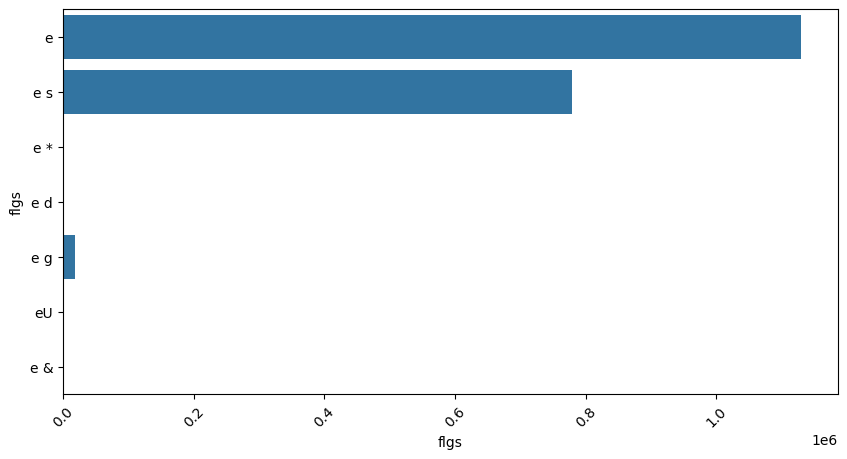

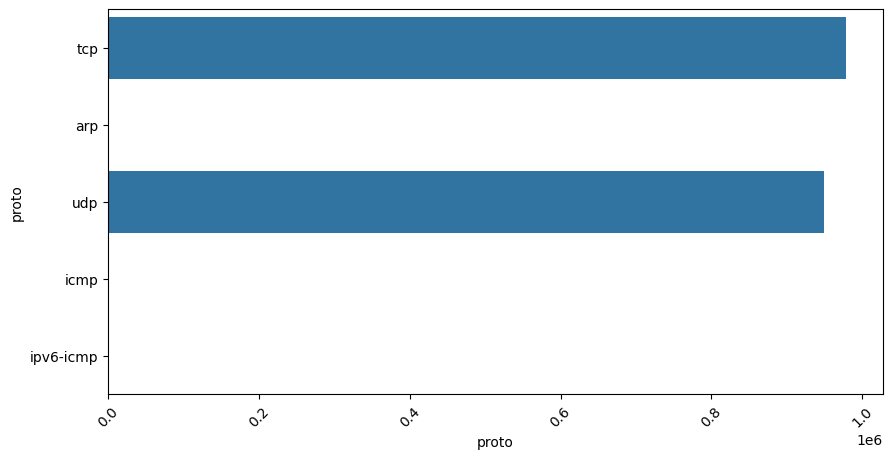

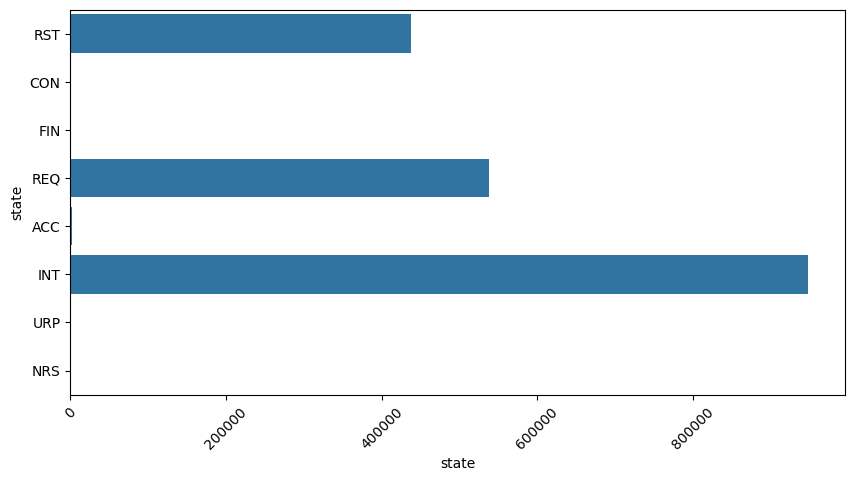

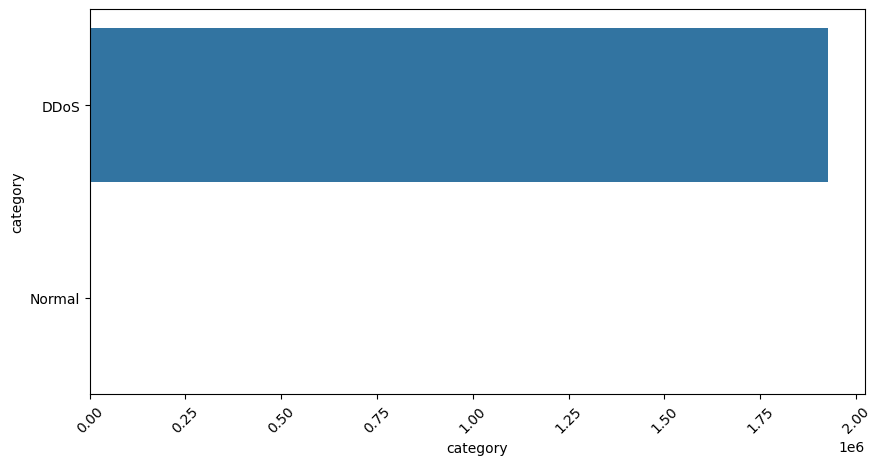

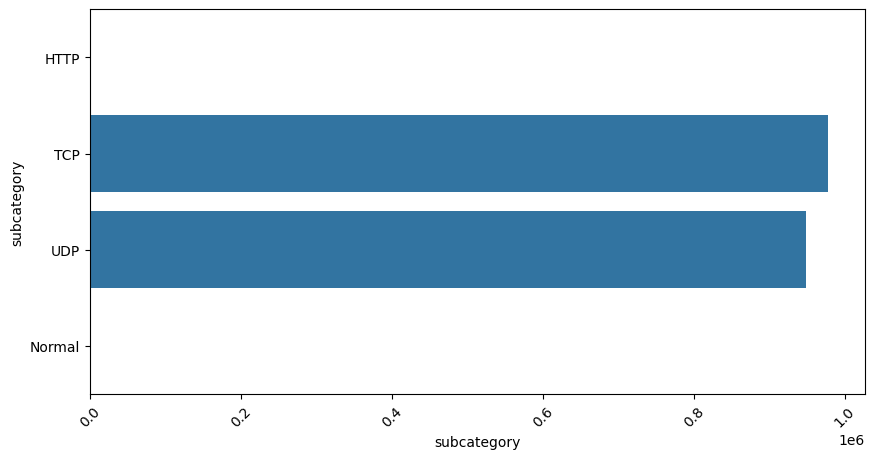

In [22]:
count_plot(category_df)

In [23]:
for col in category_df.columns:
    print(f"{col} : {len(category_df[col].unique())} unique values \n")

flgs : 7 unique values 

proto : 5 unique values 

saddr : 21 unique values 

daddr : 83 unique values 

state : 8 unique values 

category : 2 unique values 

subcategory : 4 unique values 



In [24]:
#Top most frequent categories of feature and make a list

unique_flgs = [x for x in df['flgs'].value_counts().sort_values(ascending=False).index]
unique_proto = [x for x in df['proto'].value_counts().sort_values(ascending=False).index]
unique_state = [x for x in df['state'].value_counts().sort_values(ascending=False).index]
unique_category = [x for x in df['category'].value_counts().sort_values(ascending=False).index]
unique_subcategory = [x for x in df['subcategory'].value_counts().sort_values(ascending=False).index]

print("unique_flgs=>", unique_flgs, '\n')
print("unique_proto=>", unique_proto, '\n')
print("unique_state=>", unique_state, '\n')
print("unique_category=>", unique_category, '\n')
print("unique_subcategory=>", unique_subcategory, '\n')

unique_flgs=> ['e', 'e s', 'e g', 'e *', 'eU', 'e d', 'e &'] 

unique_proto=> ['tcp', 'udp', 'arp', 'icmp', 'ipv6-icmp'] 

unique_state=> ['INT', 'REQ', 'RST', 'ACC', 'CON', 'FIN', 'URP', 'NRS'] 

unique_category=> ['DDoS', 'Normal'] 

unique_subcategory=> ['TCP', 'UDP', 'HTTP', 'Normal'] 



In [25]:
#Encoding categorical features
label_encoder = LabelEncoder()
categorical_features = ['flgs', 'proto', 'state', 'category', 'subcategory']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [26]:
print("Encoded categorical features:\n", df[categorical_features].head())

Encoded categorical features:
    flgs  proto  state  category  subcategory
0     0      3      6         0            0
1     0      3      6         0            0
2     0      3      6         0            0
3     0      3      6         0            0
4     0      3      6         0            0


In [27]:
df[categorical_features]

,flgs,proto,state,category,subcategory
0,0,3,6,0,0
1,0,3,6,0,0
2,0,3,6,0,0
3,0,3,6,0,0
4,0,3,6,0,0
...,...,...,...,...,...
1927096,0,4,1,1,1
1927097,0,4,1,1,1
1927098,0,4,1,1,1
1927099,0,4,1,1,1


In [28]:
for col in category:
    print(f'\nDescriptive statistics for {col}:')
    print(df[col].value_counts())
    print(f'Mode: {df[col].mode()[0]}')


Descriptive statistics for flgs:
flgs
0    1129681
5     778517
4      17825
2        809
6        247
3         17
1          5
Name: count, dtype: int64
Mode: 0

Descriptive statistics for proto:
proto
3    978397
4    948598
0        82
1        16
2         8
Name: count, dtype: int64
Mode: 3

Descriptive statistics for saddr:
saddr
192.168.100.147              520012
192.168.100.148              494696
192.168.100.150              457002
192.168.100.149              451641
192.168.100.3                  3625
192.168.100.4                    19
192.168.100.1                    16
192.168.100.46                   15
192.168.100.27                   14
192.168.100.7                    13
192.168.100.5                    12
192.168.100.6                    11
fe80::250:56ff:febe:254           6
fe80::c0c0:aa20:45b9:bdd9         4
192.168.100.55                    3
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          2
fe80::250:56ff:febe:89ee          2
fe80::2c6a:f

## **Exploratory Data Analysis (EDA)**

**Descriptive Static**

In [29]:
#For Categorical Column 
for col in category:
    print(f'\nDescriptive statistics for {col}:')
    print(df[col].value_counts())
    print(f'Mode: {df[col].mode()[0]}')


Descriptive statistics for flgs:
flgs
0    1129681
5     778517
4      17825
2        809
6        247
3         17
1          5
Name: count, dtype: int64
Mode: 0

Descriptive statistics for proto:
proto
3    978397
4    948598
0        82
1        16
2         8
Name: count, dtype: int64
Mode: 3

Descriptive statistics for saddr:
saddr
192.168.100.147              520012
192.168.100.148              494696
192.168.100.150              457002
192.168.100.149              451641
192.168.100.3                  3625
192.168.100.4                    19
192.168.100.1                    16
192.168.100.46                   15
192.168.100.27                   14
192.168.100.7                    13
192.168.100.5                    12
192.168.100.6                    11
fe80::250:56ff:febe:254           6
fe80::c0c0:aa20:45b9:bdd9         4
192.168.100.55                    3
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          2
fe80::250:56ff:febe:89ee          2
fe80::2c6a:f

In [30]:
#For Numerical Column
numerical = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

for col in numerical:
    print(f'\nDescriptive statistics for {col}:')
    print(f'Mean: {df[col].mean()}')
    print(f'Median: {df[col].median()}')
    print(f'Mode: {df[col].mode().iloc[0]}')  # Mengambil mode pertama jika ada beberapa mode
    print(f'Standard Deviation: {df[col].std()}')
    print(f'Min: {df[col].min()}')
    print(f'Max: {df[col].max()}')
    print(f'25th Percentile: {df[col].quantile(0.25)}')
    print(f'50th Percentile: {df[col].quantile(0.50)}')
    print(f'75th Percentile: {df[col].quantile(0.75)}')


Descriptive statistics for pkSeqID:
Mean: 2613811.0
Median: 2613811.0
Mode: 1650261
Standard Deviation: 556306.284890347
Min: 1650261
Max: 3577361
25th Percentile: 2132036.0
50th Percentile: 2613811.0
75th Percentile: 3095586.0

Descriptive statistics for flgs_number:
Mean: 1.4429155503525761
Median: 1.0
Mode: 1
Standard Deviation: 0.6024242845634928
Min: 1
Max: 7
25th Percentile: 1.0
50th Percentile: 1.0
75th Percentile: 2.0

Descriptive statistics for proto_number:
Mean: 1.9845659360874184
Median: 1.0
Mode: 1
Standard Deviation: 0.9998889317793719
Min: 1
Max: 5
25th Percentile: 1.0
50th Percentile: 1.0
75th Percentile: 3.0

Descriptive statistics for pkts:
Mean: 7.913937048447383
Median: 7.0
Mode: 7
Standard Deviation: 159.19745877277398
Min: 1
Max: 70057
25th Percentile: 5.0
50th Percentile: 7.0
75th Percentile: 10.0

Descriptive statistics for bytes:
Mean: 1126.113072433671
Median: 616.0
Mode: 420
Standard Deviation: 154895.09592276195
Min: 60
Max: 71833345
25th Percentile: 420.0


In [31]:
#For Timestamp
print(f'\nTimestamp Range:')
print(f'Start: {df["stime"].min()}')
print(f'End: {df["ltime"].max()}')


Timestamp Range:
Start: 2018-05-15 00:27:11.665140152
End: 2018-06-04 09:04:36.412090063


**Visualization**

*Apa faktor yang paling berpengaruh terhadap terjadinya serangan DDoS dengan category?*

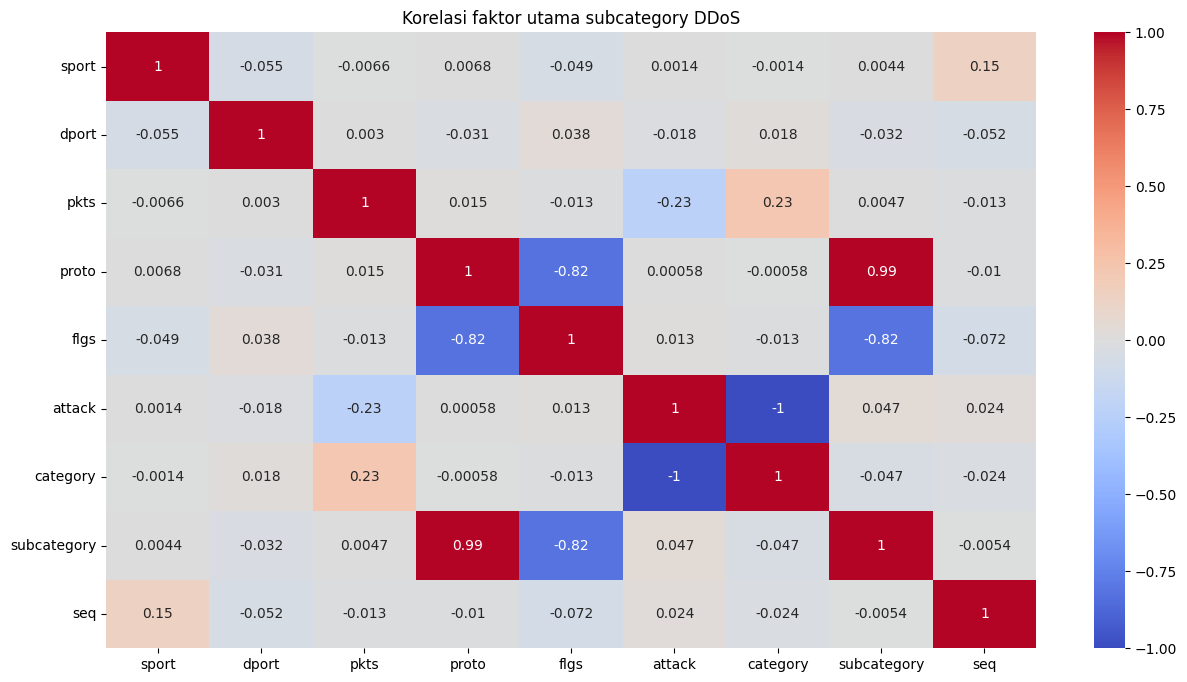

In [32]:
correlation_matrix = df[['sport','dport','pkts', 'proto', 'flgs', 'attack', 'category','subcategory', 'seq']].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi faktor utama subcategory DDoS')
plt.show()

*Apa state yang paling dominan terjadi selama serangan dan apakah lebih banyak koneksi yang berhasil diselesaikan atau terputus di tengah jalan?*

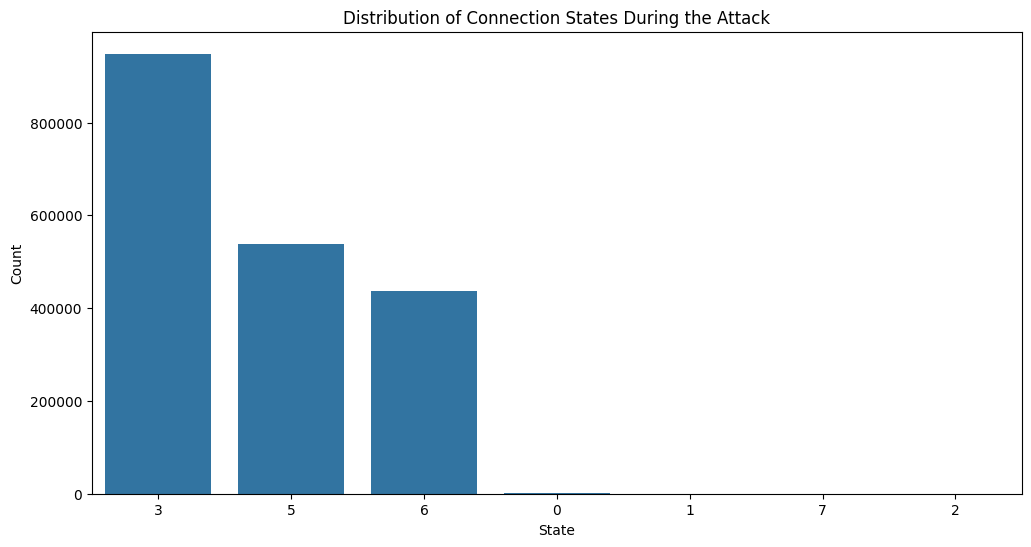

In [33]:
# Filter the data to include only attack instances
attack_data = df[df['attack'] == 1.0]

# Plot the distribution of connection states during the attack
plt.figure(figsize=(12, 6))
sns.countplot(data=attack_data, x='state', order=attack_data['state'].value_counts().index)
plt.title('Distribution of Connection States During the Attack')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Status koneksi paling dominan selama serangan adalah state 3, dengan jumlah kejadian hampir mencapai 900.000. State 3 memiliki jumlah kejadian yang sangat tinggi dibandingkan dengan status lainnya. Ini menunjukkan bahwa selama serangan, koneksi dengan status ini sangat sering terjadi. State 3 menunjukkan "INT" yang berarti "Interrupted". Dalam konteks serangan DDoS, status "INT" atau "Interrupted" biasanya mengindikasikan bahwa koneksi tidak berhasil diselesaikan atau terputus di tengah jalan. Jumlah kejadian "INT" yang sangat tinggi (hampir 900.000) menunjukkan bahwa selama serangan, banyak koneksi yang tidak berhasil diselesaikan. Ini adalah karakteristik umum dari serangan DDoS, di mana tujuan utamanya adalah untuk membanjiri jaringan atau server dengan permintaan yang tidak valid atau tidak selesai, sehingga mengganggu layanan normal. Status "INT" yang dominan menunjukkan bahwa serangan tersebut kemungkinan besar melibatkan teknik yang menyebabkan gangguan pada koneksi, seperti SYN flood, di mana banyak permintaan SYN (synchronization) dikirim tanpa menyelesaikan proses handshake tiga langkah TCP.



*Bagaimana variasi jumlah paket di status koneksi state 3 (INT) dan 7 (URP) dibandingkan dengan state 0 (ACC), 1 (CON), 5 (REQ), dan 6 (RST)?*


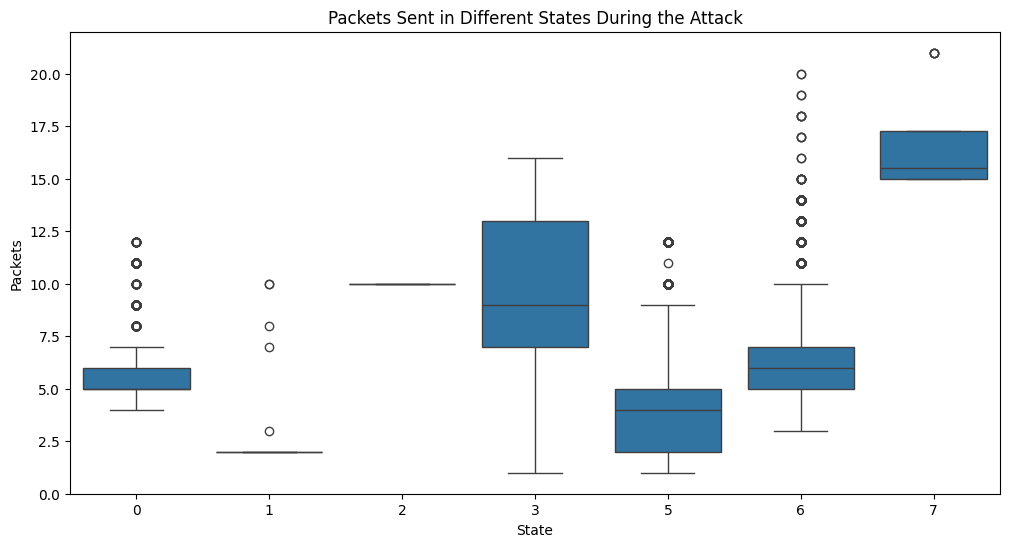

In [34]:
# Plot the distribution of packets sent in different states
plt.figure(figsize=(12, 6))
sns.boxplot(data=attack_data, x='state', y='pkts')
plt.title('Packets Sent in Different States During the Attack')
plt.xlabel('State')
plt.ylabel('Packets')
plt.show()

Analisis dari visualisasi data di bawah menunjukkan distribusi jumlah paket yang dikirim dalam berbagai status koneksi selama serangan DDoS. Visualisasi ini menunjukkan bahwa selama serangan DDoS, status koneksi tertentu (terutama state INT dan URP) memiliki jumlah paket yang tinggi, mengindikasikan bahwa status tersebut mungkin paling terkait dengan serangan yang intens. Status koneksi ini bisa menjadi fokus utama dalam pemantauan dan mitigasi serangan DDoS untuk mendeteksi dan merespons aktivitas berbahaya secara lebih efektif.  Dari plot ini, state 3 memiliki jumlah paket median yang cukup tinggi (sekitar 12) dengan variasi yang luas, mengindikasikan bahwa serangan dalam state ini cenderung lebih intens dengan volume paket yang tinggi. Ini mungkin mengindikasikan serangan jenis flood atau serangan lain yang menghasilkan banyak lalu lintas. State URP juga menunjukkan jumlah paket yang tinggi, dengan median sekitar 15 dan beberapa outlier lebih dari 20. Ini menunjukkan bahwa status koneksi dalam state ini sangat terkait dengan aktivitas serangan DDoS yang berat. Status koneksi lainnya seperti state ACC, CON, REQ, dan RST menunjukkan jumlah paket yang lebih rendah dan distribusi yang lebih sempit. Ini mungkin mengindikasikan bahwa status koneksi tersebut terkait dengan serangan DDoS yang kurang intens atau tahap awal/akhir serangan.

*Kapan serangan dengan durasi paling panjang dan paling pendek biasanya terjadi?*

C:\Users\Adelia Deswita\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


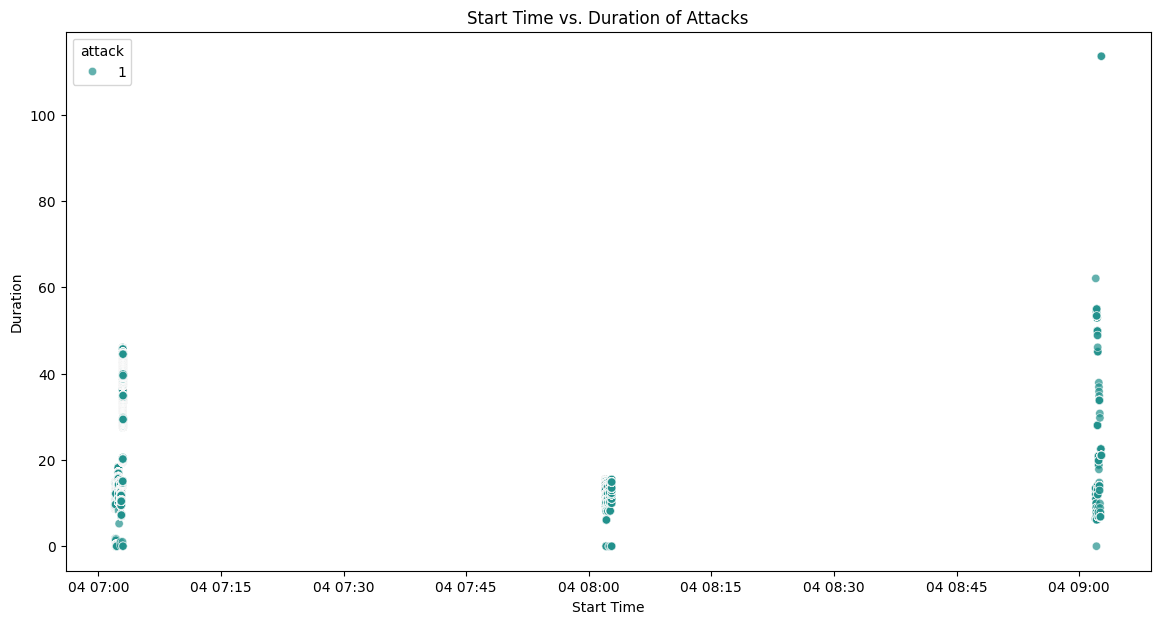

In [35]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=attack_data, x='stime', y='dur', hue='attack', palette='viridis', alpha=0.7)
plt.title('Start Time vs. Duration of Attacks')
plt.xlabel('Start Time')
plt.ylabel('Duration')
plt.show()

Serangan dengan durasi paling panjang biasanya dimulai sekitar pukul 09:00 dan serangan dengan durasi paling pendek biasanya terjadi sekitar pukul 07:00. Mengetahui kapan serangan dengan durasi panjang biasanya dimulai dapat membantu dalam mengalokasikan sumber daya yang cukup untuk penanganan insiden pada waktu-waktu tersebut. Sebaliknya, serangan berdurasi pendek mungkin lebih sulit terdeteksi namun bisa menunjukkan pola serangan yang cepat dan singkat, sehingga memerlukan strategi deteksi cepat. Maka dari itu, dengan memahami durasi dan waktu mulai serangan sangat penting untuk meningkatkan efektivitas respons dan pertahanan terhadap ancaman cyber.

*Siapa sumber IP Address yang paling banyak melakukan serangan?*

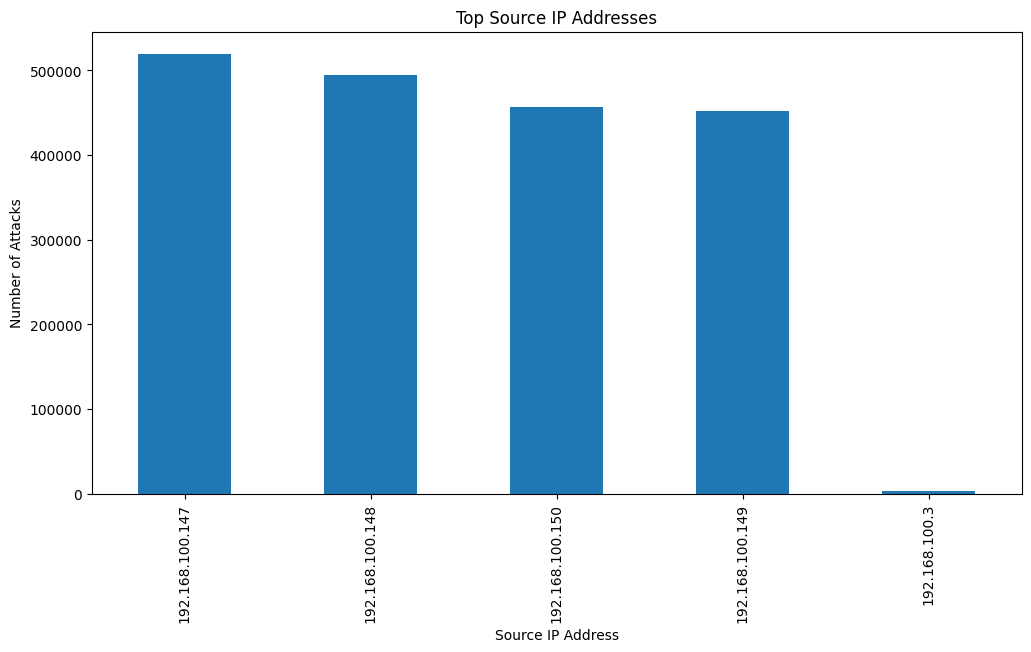

In [36]:
plt.figure(figsize=(12, 6))
attack_data['saddr'].value_counts().head(10).plot(kind='bar')
plt.title('Top Source IP Addresses')
plt.xlabel('Source IP Address')
plt.ylabel('Number of Attacks')
plt.show()

Berdasarkan visualisasi data di bawah, dapat dilihat bahwa IP Address yang paling banyak melakukan serangan adalah 192.168.100.147 dengan jumlah serangan di atas > 500.000 serangan.

*Dimana letak anomali terjadi pada serangan tersebut?*


C:\Users\Adelia Deswita\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


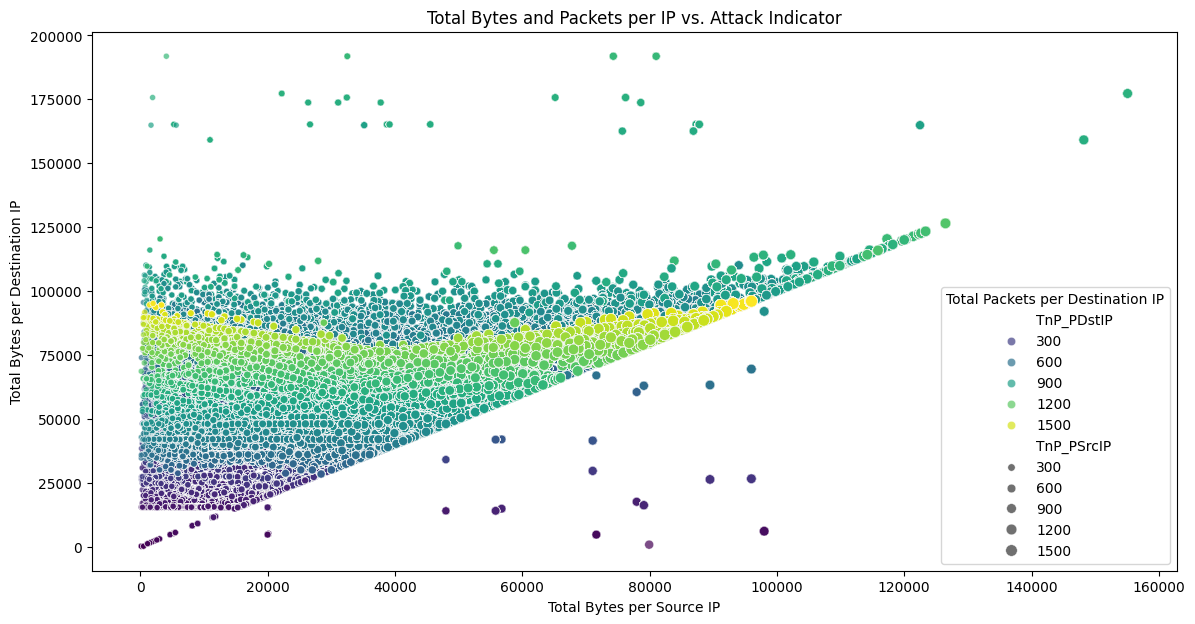

In [37]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=attack_data, x='TnBPSrcIP', y='TnBPDstIP', size='TnP_PSrcIP', hue='TnP_PDstIP', palette='viridis', alpha=0.7)
plt.title('Total Bytes and Packets per IP vs. Attack Indicator')
plt.xlabel('Total Bytes per Source IP')
plt.ylabel('Total Bytes per Destination IP')
plt.legend(title='Total Packets per Destination IP')
plt.show()

Pada grafik tersebut, potensi serangan siber yang paling mencolok terlihat pada area dengan jumlah byte dan packet yang sangat tinggi, terutama di sudut kanan atas grafik. Titik-titik dengan warna yang lebih terang (kuning dan hijau terang) menunjukkan bahwa jumlah paket dan byte yang dikirim dan diterima oleh IP tersebut sangat tinggi. Ini dapat menunjukkan adanya aktivitas yang tidak biasa atau anomali yang sering kali dikaitkan dengan serangan siber, seperti Distributed Denial of Service (DDoS) attacks. Sedangkan titik-titik dengan jumlah byte dan paket yang sangat rendah di bagian bawah grafik menunjukkan aktivitas jaringan yang normal atau rendah. IP dengan aktivitas rendah mungkin karena mereka terhubung ke jaringan tetapi tidak melakukan banyak komunikasi. Ini bisa disebabkan oleh berbagai alasan seperti perangkat yang tidak aktif, pengguna yang tidak banyak melakukan aktivitas jaringan, atau perangkat yang hanya mengirimkan sinyal heartbeat untuk menjaga koneksi tetap hidup tanpa data signifikan yang ditransmisikan.

*Apa protokol yang paling banyak digunakan dalam serangan dan mengapa protokol tersebut banyak digunakan?*

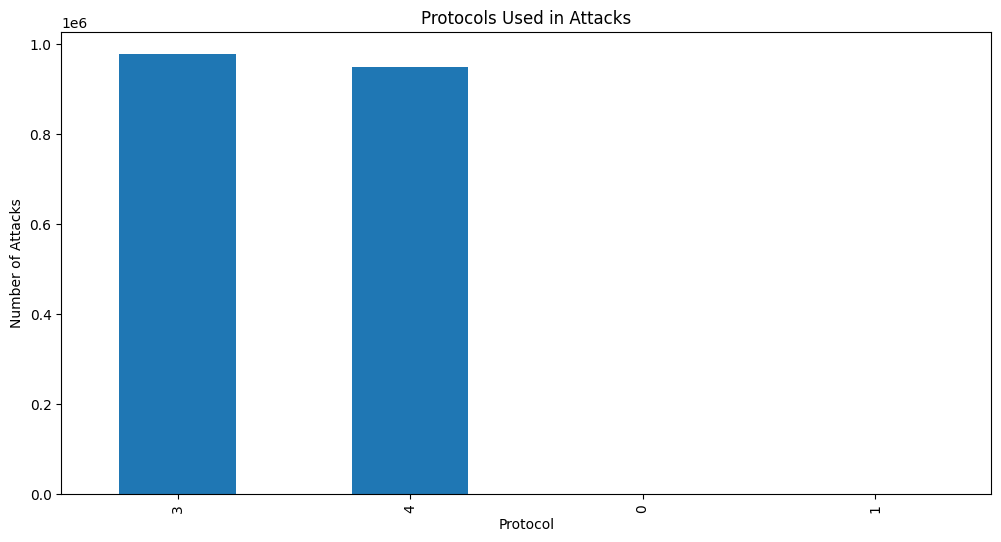

In [38]:
plt.figure(figsize=(12, 6))
attack_data['proto'].value_counts().plot(kind='bar')
plt.title('Protocols Used in Attacks')
plt.xlabel('Protocol')
plt.ylabel('Number of Attacks')
plt.show()

Grafik ini menunjukkan protokol yang digunakan dalam serangan. Protokol 3, yaitu TCP adalah protokol yang paling banyak digunakan dalam serangan. Hal ini disebabkan TCP adalah protokol yang umum digunakan untuk komunikasi internet, serangan DDoS berbasis TCP dapat sangat efektif dalam mengganggu layanan.

*Manakah subkategori serangan yang paling konsisten dalam jumlah paket yang dikirim?*

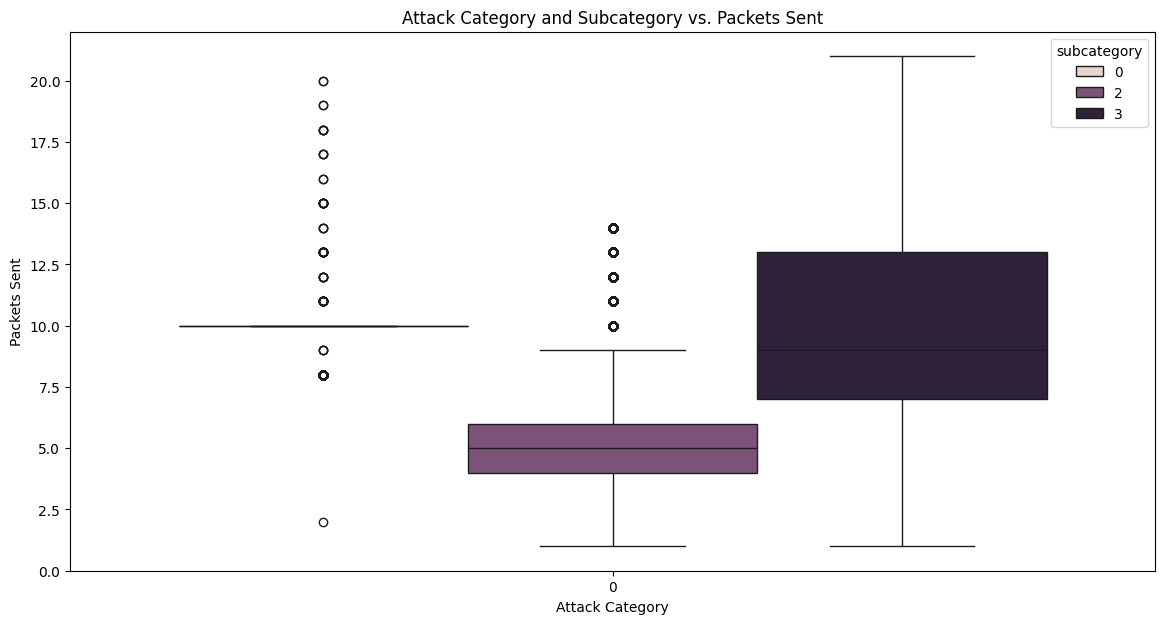

In [39]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=attack_data, x='category', y='pkts', hue='subcategory')
plt.title('Attack Category and Subcategory vs. Packets Sent')
plt.xlabel('Attack Category')
plt.ylabel('Packets Sent')
plt.show()

Subkategori 2 (TCP) adalah yang paling konsisten dalam jumlah paket yang dikirim, dengan median di sekitar 5 dan distribusi yang lebih sempit. Ini menunjukkan bahwa serangan dalam subkategori ini cenderung lebih konsisten dalam hal volume trafik yang dihasilkan.

*Apakah ada hubungan linear yang jelas antara jumlah paket yang dikirim dan diterima selama serangan?*
*Mengapa peningkatan jumlah paket yang dikirim berhubungan erat dengan peningkatan jumlah paket yang diterima?*

C:\Users\Adelia Deswita\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


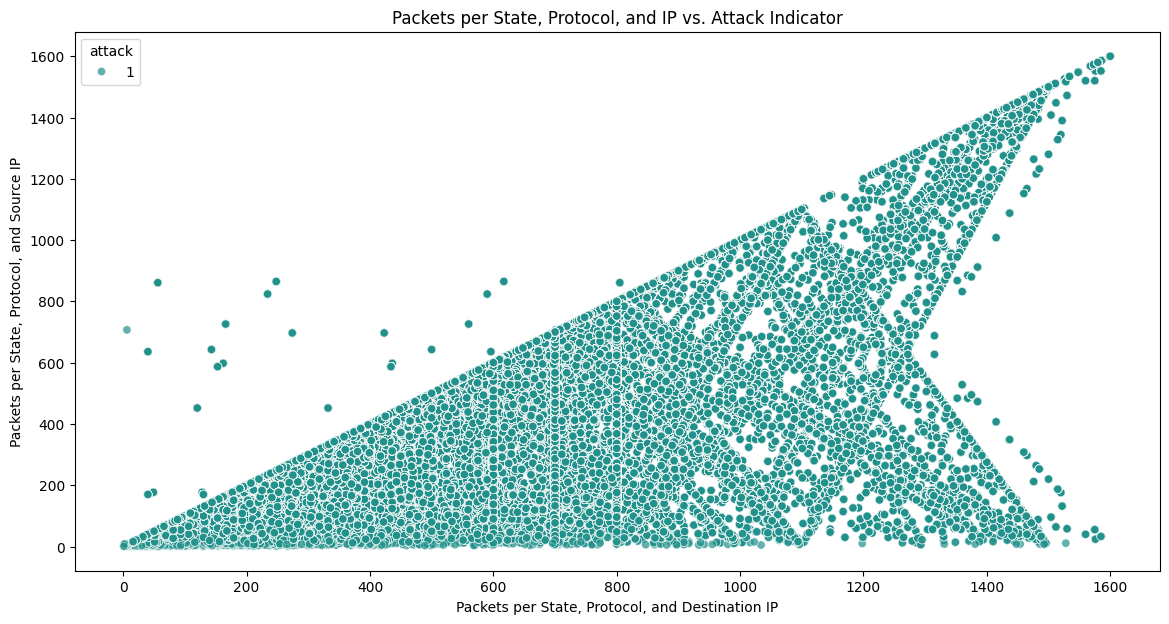

In [40]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=attack_data, x='Pkts_P_State_P_Protocol_P_DestIP', y='Pkts_P_State_P_Protocol_P_SrcIP', hue='attack', palette='viridis', alpha=0.7)
plt.title('Packets per State, Protocol, and IP vs. Attack Indicator')
plt.xlabel('Packets per State, Protocol, and Destination IP')
plt.ylabel('Packets per State, Protocol, and Source IP')
plt.show()

Ada hubungan linear yang jelas antara jumlah paket yang dikirim dan diterima selama serangan. Ini ditunjukkan oleh pola segitiga yang terbentuk dalam plot, yang mengindikasikan bahwa peningkatan jumlah paket yang dikirim berhubungan erat dengan peningkatan jumlah paket yang diterima.  Pola umum yang terlihat adalah adanya korelasi positif yang kuat antara jumlah paket yang diterima dan dikirim. Ini ditunjukkan oleh distribusi data berbentuk segitiga di mana semakin banyak paket yang dikirim, semakin banyak juga paket yang diterima. Korelasi positif yang kuat antara variabel sumbu x dan y menunjukkan bahwa aktivitas paket yang lebih tinggi di IP tujuan dikaitkan dengan aktivitas paket yang lebih tinggi di IP sumber selama serangan. Ini menunjukkan sifat dari serangan Distributed Denial of Service (DDoS), di mana banyak sumber terlibat dalam mengirimkan volume paket yang besar ke target. Peningkatan jumlah paket yang dikirim berhubungan erat dengan peningkatan jumlah paket yang diterima karena dalam banyak serangan siber, terutama DDoS, serangan dirancang untuk mengirimkan sejumlah besar paket ke target. Semakin banyak paket yang dikirim dari sumber, semakin banyak paket yang diterima oleh target, yang menyebabkan beban tinggi pada sumber daya target.

*Bagaimana pola umum yang terlihat dalam hubungan antara jumlah koneksi masuk per IP sumber dan IP tujuan selama serangan?*

C:\Users\Adelia Deswita\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


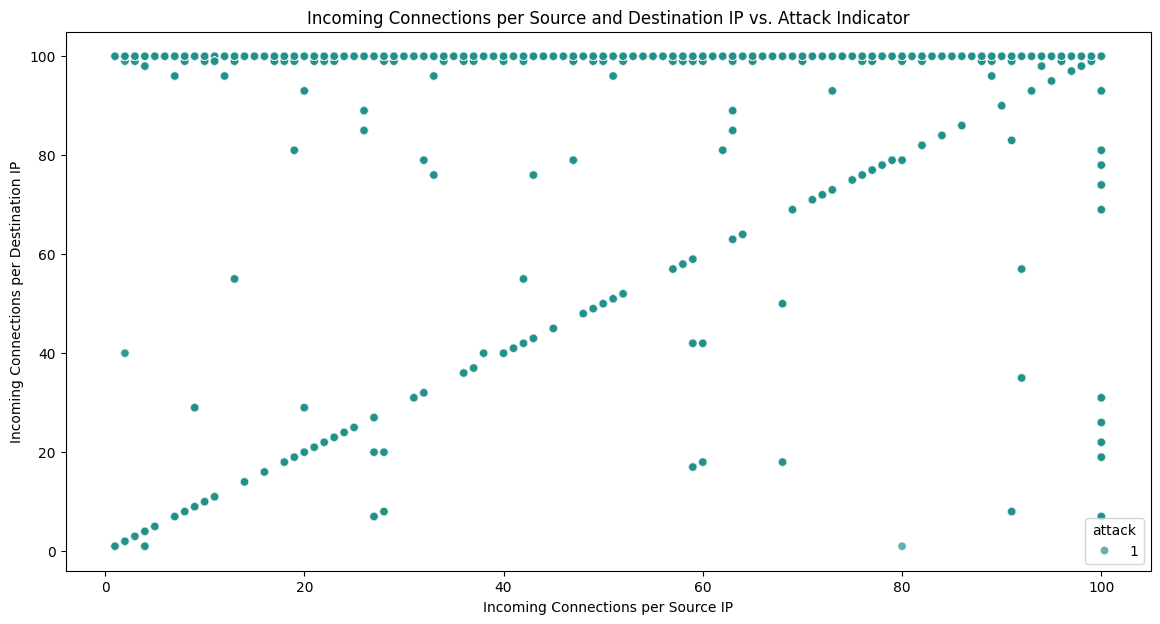

In [41]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=attack_data, x='N_IN_Conn_P_SrcIP', y='N_IN_Conn_P_DstIP', hue='attack', palette='viridis', alpha=0.7)
plt.title('Incoming Connections per Source and Destination IP vs. Attack Indicator')
plt.xlabel('Incoming Connections per Source IP')
plt.ylabel('Incoming Connections per Destination IP')
plt.show()


Pola umum yang terlihat adalah adanya hubungan linear yang kuat antara jumlah koneksi masuk per IP sumber dan IP tujuan. Ini ditunjukkan oleh garis diagonal yang terbentuk dari kiri bawah ke kanan atas pada grafik. Konsentrasi tinggi titik data pada nilai maksimal koneksi masuk per IP tujuan menunjukkan bahwa beberapa IP tujuan menerima jumlah koneksi masuk yang sangat tinggi, mencapai batas maksimal yang diizinkan. Ini menunjukkan bahwa IP-IP tersebut kemungkinan besar sedang menjadi target utama serangan siber, seperti serangan DDoS. Seiring dengan peningkatan jumlah koneksi masuk per IP sumber, jumlah koneksi masuk per IP tujuan juga meningkat. Namun, ada variasi yang lebih besar dalam jumlah koneksi yang diterima oleh IP tujuan. Ini mencerminkan pola serangan DDoS di mana banyak sumber mengirimkan sejumlah besar koneksi ke beberapa target. Hubungan linear kuat antara koneksi masuk per IP sumber dan IP tujuan menunjukkan bahwa serangan melibatkan banyak sumber yang mengirimkan koneksi ke target yang sama. Ini merupakan karakteristik umum dari serangan DDoS, di mana tujuannya adalah untuk membanjiri target dengan lalu lintas yang sangat tinggi. Distribusi data berbentuk segitiga menunjukkan bahwa seiring dengan peningkatan jumlah koneksi masuk per IP sumber, jumlah koneksi masuk per IP tujuan juga meningkat, tetapi ada variasi yang lebih besar dalam jumlah koneksi yang diterima oleh IP tujuan

*Bagaimana distribusi protokol yang digunakan dan teknik serangan berdasarkan flag yang terjadi pada serangan?*

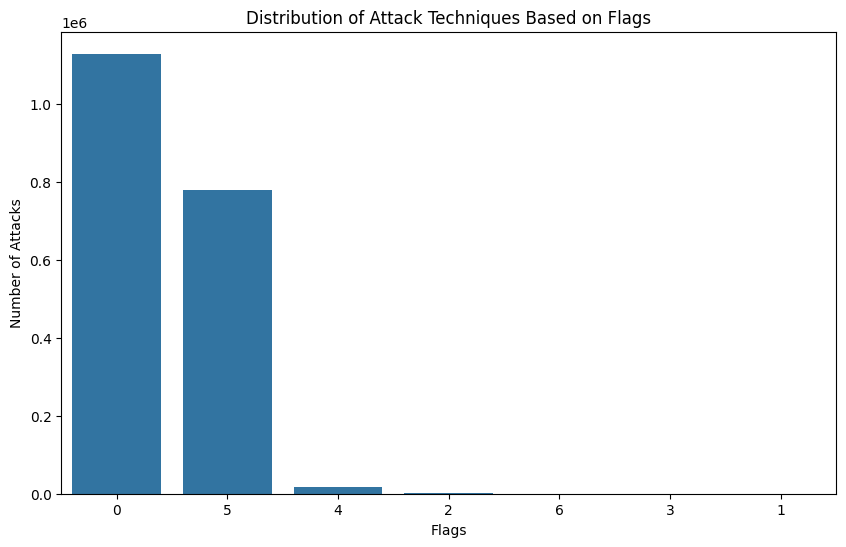

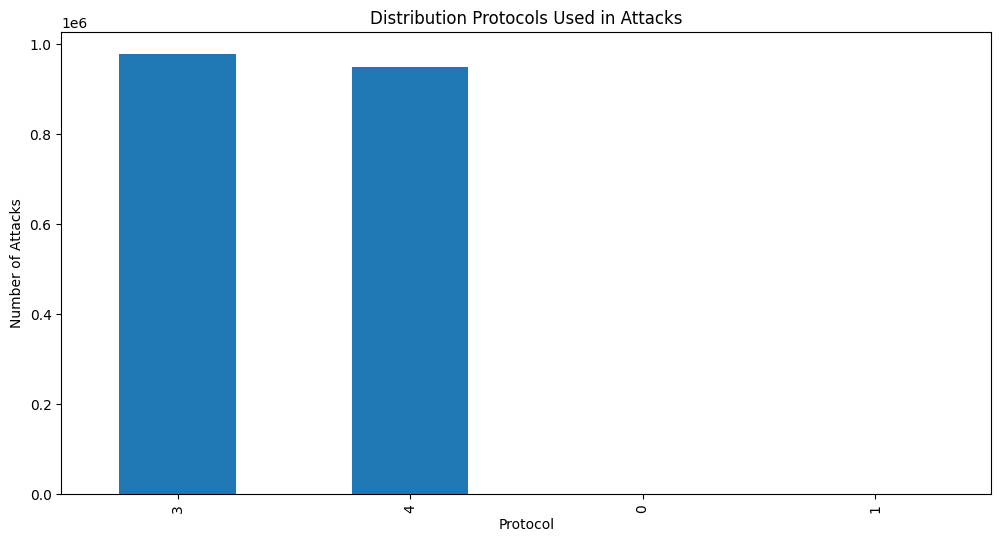

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='flgs', order=df['flgs'].value_counts().index)
plt.title('Distribution of Attack Techniques Based on Flags')
plt.xlabel('Flags')
plt.ylabel('Number of Attacks')
plt.show()

plt.figure(figsize=(12, 6))
attack_data['proto'].value_counts().plot(kind='bar')
plt.title('Distribution Protocols Used in Attacks')
plt.xlabel('Protocol')
plt.ylabel('Number of Attacks')
plt.show()


Pada distribusi protokol teknik serangan berdasarkan flags, flags 0 (e) menunjukkan serangan yang tidak teridentifikasi atau serangan umum yang tidak memiliki karakteristik khusus yang ditandai oleh sistem keamanan. Hal ini bisa terjadi karena banyak serangan siber yang bersifat umum dan tidak memiliki tanda-tanda yang spesifik. Sedangkan distribusi serangan berdasarkan protokol, protokol 3 dan 4, keduanya mendominasi jumlah serangan dengan hampir 1 juta serangan masing-masing yang merupakan protokol yang paling sering disalahgunakan dalam serangan siber. Protokol 3 (TCP) dan 4 (UDP) mungkin merupakan protokol yang paling rentan terhadap serangan atau paling sering digunakan dalam komunikasi jaringan sehingga menjadi target utama bagi penyerang siber.

## **Data Modelling**

In [43]:
# Separate features and target
X = df.drop(columns=['attack', 'pkts', 'proto', 'seq', 'pkSeqID', 'stime', 'ltime', 'saddr', 'daddr', 'flgs'])
y = df['attack']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Random Forest

In [44]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Model:", accuracy_rf)

Akurasi Model: 1.0


In [45]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Model

In [46]:
# fitting Logistic regression model using hyperparameter

lg_class = LogisticRegression()
lg_class.fit(X_train, y_train)

c:\Users\Adelia Deswita\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Logistic model prediction
y_hat = lg_class.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_hat)
print("Akurasi Model:", accuracy_lg)

Akurasi Model: 0.9999135144110937


Decision Tree

In [48]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi Model:", accuracy_dt)

Akurasi Model: 1.0


## **Evaluation**

Random Forest

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00    577988

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131

Confusion Matrix:
[[   143      0]
 [     0 577988]]


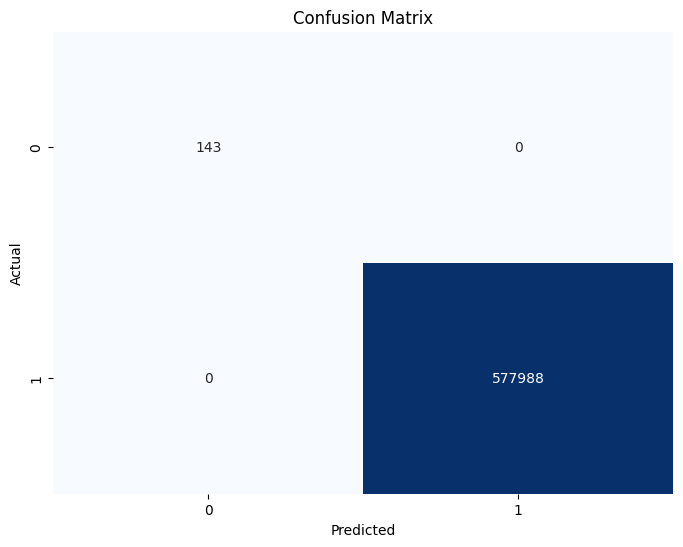

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
report_lg = classification_report(y_test, y_hat)
print("Classification Report:")
print(report_lg)

conf_matrix_lg = confusion_matrix(y_test, y_hat)
print("Confusion Matrix:")
print(conf_matrix_lg)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       143
           1       1.00      1.00      1.00    577988

    accuracy                           1.00    578131
   macro avg       0.93      0.89      0.91    578131
weighted avg       1.00      1.00      1.00    578131

Confusion Matrix:
[[   112     31]
 [    19 577969]]


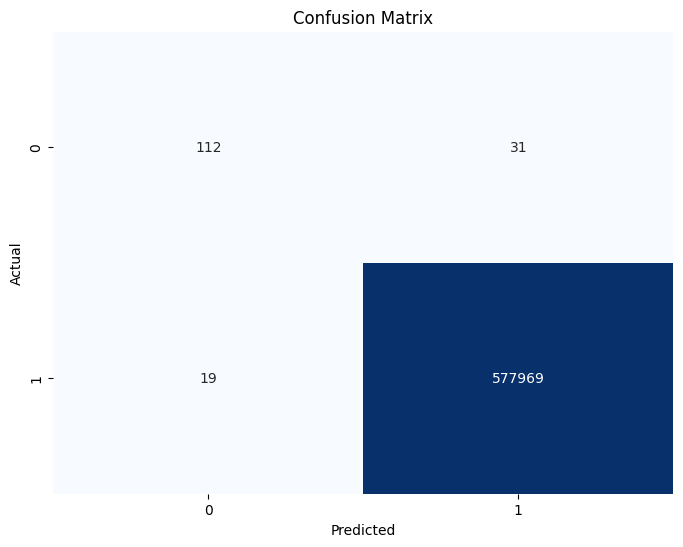

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(report_dt)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00    577988

    accuracy                           1.00    578131
   macro avg       1.00      1.00      1.00    578131
weighted avg       1.00      1.00      1.00    578131

Confusion Matrix:
[[   143      0]
 [     0 577988]]


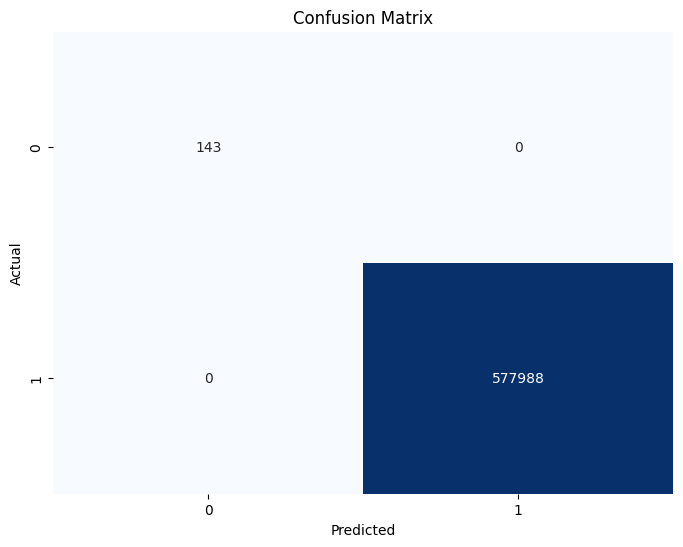

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Result Evaluation

In [55]:
m1 = "Random Forest"
m2 = "Logistic Model"
m3 = "Decision Tree"

results = {"Models": [m1, m2, m3],
           "Accuracy": [accuracy_rf, accuracy_lg, accuracy_dt]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_data=pd.DataFrame(results)

In [56]:
result_data

,Models,Accuracy
0,Random Forest,100.000000
1,Logistic Model,99.991351
2,Decision Tree,100.000000


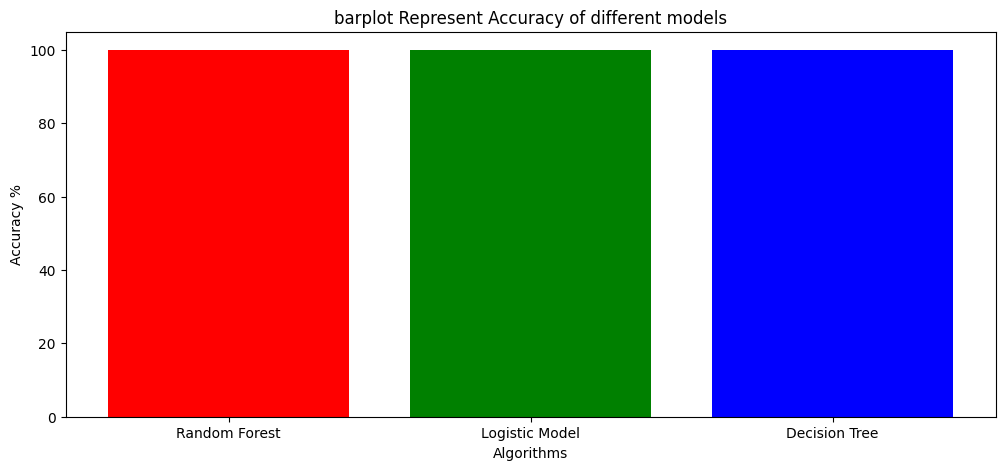

In [57]:
colors = ['red','green','blue']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(result_data['Models'],result_data['Accuracy'],color = colors)
plt.show()

Hasil evaluasi  menunjukkan bahwa Random Forest dan Decision Tree berhasil mencapai akurasi 100%, sementara Logistic Model mencapai 99.991351%